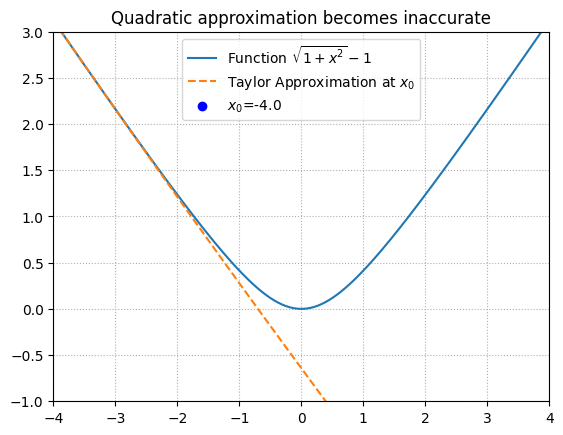

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import jax.numpy as jnp
from jax import grad, jit

# Define the function
def f(x):
    return (1 + x**2)**(1/2) - 1

# Get the gradient and hessian of the function
df = jit(grad(f))
d2f = jit(grad(df))

# Define the Taylor approximation at a point x
def taylor_approximation(x, x0):
    return f(x0) + df(x0) * (x - x0) + 0.5 * d2f(x0) * (x - x0)**2

# Define the minimum of the Taylor approximation
def taylor_min(x0):
    return x0 - df(x0) / d2f(x0)

# Set up the animation
fig, ax = plt.subplots()
x = jnp.linspace(-4, 4, 400)

def animate(i):
    ax.clear()
    # Adjusting xi to oscillate between -4 and 4
    xi = -4 + (8 / 800) * (i % 800) if i < 800 else 4 - (8 / 800) * (i % 800)
    ax.plot(x, f(x), label="Function $\sqrt{1 + x^2} - 1$")
    ax.plot(x, taylor_approximation(x, xi), label=f"Taylor Approximation at $x_0$", linestyle='dashed')
    ax.scatter([xi], [f(xi)], color='blue', label=f"$x_0$={xi:.1f}")
    ax.scatter([taylor_min(xi)], [taylor_approximation(taylor_min(xi), xi)], color='orange')
    ax.legend(loc="upper center")
    ax.set_title('Quadratic approximation becomes inaccurate')
    ax.set_ylim([-1, 3])
    ax.set_xlim([-4, 4])
    ax.grid(linestyle=":")

# Adjusted frames to have a complete oscillation
ani = animation.FuncAnimation(fig, animate, frames=range(1600), repeat=True)

# Save the animation
ani.save('inaccurate_taylor.mp4', writer='ffmpeg', fps=60, dpi=200)

plt.show()
